In [1]:
import sys
import numpy as np
sys.path.append("../src/")
from smearing_matrix import *

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-reb8dift because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#######################################################################
# Declare ROOT files for the Analysis
#######################################################################

root_files = ["../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_0.root",
              "../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_1.root",
              "../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_2.root",
              "../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_3.root",
              "../../projects/ana_v1/volatile/data/piplus_piminus/MC_RGA_3051_4.root"]

In [5]:
#######################################################################
# 2d Rectangular Binning
#######################################################################

rect_bin_factory = RectBinFactory()
rect_bin_factory.make_bins("Mh",np.linspace(0.2,2,10))
rect_bin_factory.make_bins("pTtot",np.linspace(0,1.35,10))

In [16]:
#######################################################################
# Custom Binning
#######################################################################

custom_bin_factory = CustomBinFactory(["z1","z2"])

custom_bin_factory.add_curve("region_1","z1>z2")
custom_bin_factory.add_curve("region_2","z1<z2")

custom_bin_factory.make_bin(["region_1"])
custom_bin_factory.make_bin(["region_2"])

In [17]:
#######################################################################
# Load all Binnings into the BinManager
#######################################################################

bin_manager = BinManager()
bin_manager.load_factory(rect_bin_factory)
bin_manager.load_factory(custom_bin_factory)

In [18]:
#######################################################################
# Create and run smearing matrix
#######################################################################

smearing_matrix = SmearingMatrix(root_files, bin_manager)

smearing_matrix.run()

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 15.28it/s]


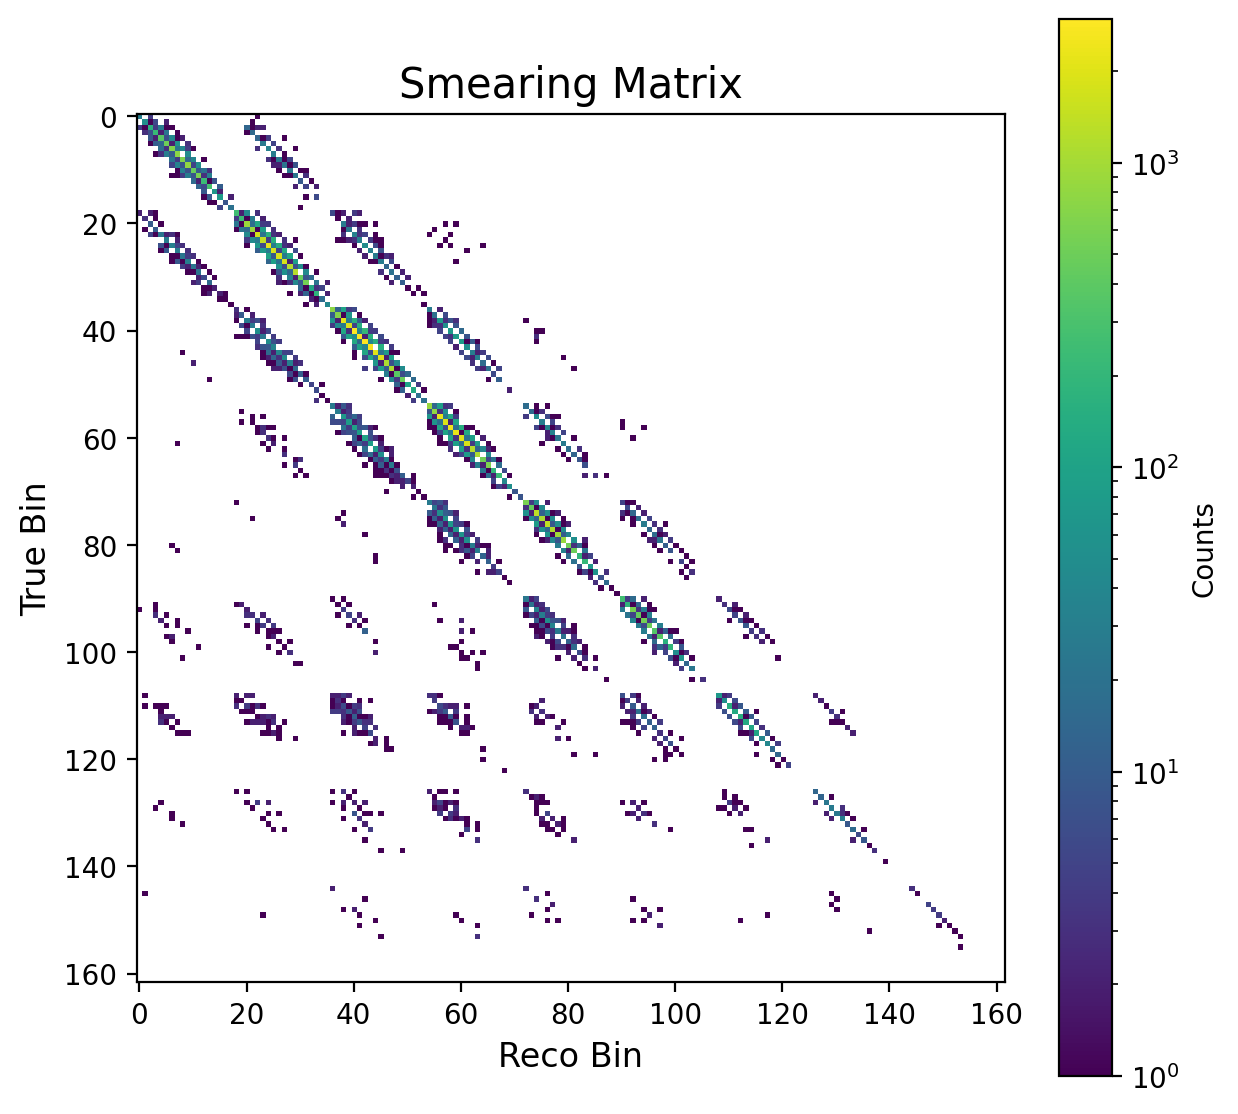

In [19]:
smearing_matrix.draw_smearing_matrix(do_log_scale=True,
                                     show_overflow=False)

In [20]:
#######################################################################
# Reading the unique bin id for a given data set
#######################################################################

Mh=0.7, pTtot=0.4, z1=0.3, z2=0.4

values = {"Mh": np.array([Mh]), "pTtot": np.array([pTtot]) , 
          "z1": np.array([z1]), "z2": np.array([z2])}

bin_manager.print_bins_from_values(values)

Unique ID for Mh=[0.7] , pTtot=[0.4] , z1=[0.3] , z2=[0.4] ,  ---> 42
Bin edges for Unique id 42 
([Mh]>0.6000000000000001)&([Mh]<0.8)
([pTtot]>0.30000000000000004)&([pTtot]<0.45000000000000007)
([z1]<[z2]) 

